<br><br><font color="gray">INTEG 440 / 640<br>MODULE 4 of *Doing Computational Social Science*</font>


# <font color="green" size=40>COLLECTING DATA FROM THE WEB: APPLICATION PROGRAMMING INTERFACES (APIs)</font>

<br>

Dr. [John McLevey](http://www.johnmclevey.com)    
Department of Knowledge Integration   
Department of Sociology & Legal Studies     
University of Waterloo         

<hr>

* INTEG 440 (Undergraduate): This module is worth <font color='#437AB2'>**8%**</font> of your final grade. The questions in this module add up to 10 points. 
* INTEG 640 (Graduate): This module is worth <font color='#437AB2'>**5%**</font> of your final grade. The questions in this module add up to 10 points. 

<hr>

# Table of Contents 

* [Overview](#o)
* [Learning Outcomes](#lo) 
* [Prerequisite Knowledge](#pk) 
* [Assigned Readings](#ar) 
* [Question Links](#ql)
* [Packages Used in this Module](#packs)
* [Data Used in this Module](#data)
* [**Collecting Data From Twitter**](#from_twitter)
* [**The REST API**](#rest)
* [**The Streaming API**](#stream)
* [References](#refs)
<hr>  

# Overview <a id='o'></a>

It is not always necessary (or desirable) to collect data from websites with web scrapers and crawlers. Many, such as social media platforms like Twitter, make at least some of their data available to developers and researchers using Application Programming Interfaces (APIs). This module introduces APIs and walks through two examples: the REST API and the Streaming API from Twitter. 

<hr>

# Learning Outcomes  <a id='lo'></a>

Upon successful completion of this module, you will be able to: 

1. Explain what APIs are and how they work 
2. Write Python code to collect and store data from an API
3. Collect, store, and analyze user account data and historical Tweet data from Twitter's REST API
4. Collect, store, and analyze real-time Tweet data from Twitter's Streaming API 

<hr>

# Prerequisite Knowledge  <a id='pk'></a>

This module utilizes many tools that were introduced in Module 3 (Python for Researchers). At this point, you should have at least a basic familiarity with basic data types (especially strings) and structures (especially lists and dictionaries), conditional execution, functions, and knowledge of how to create and manipulate `Pandas` dataframes. It is normal to feel a little uncertain. Feel free to revisit the basic concepts from previous modules as you progress through this and subsequent modules. 

<hr>

# Assigned Readings  <a id='ar'></a>

There are no "assigned readings" for this Module. Instead, there are links to external resources throughout the Module that you *may* choose to consult for more information. 

<hr>

# Question Links <a id='ql'></a>

Make sure you have answered all of the following questions before submitting this notebook on LEARN. 

1. [Question 1](#yt1) 
2. [Question 2](#yt2) 
3. [Question 3](#yt3) 
4. [Question 4](#yt4) 
5. [Question 5](#yt5) 
6. [Question 6](#yt6) 
7. [Question 7](#yt7) 
8. [Question 8](#yt8) 
9. [Question 9](#yt9) 
10. [Question 10](#yt10) 

<hr>

# Packages Used in this Module   <a id='packs'></a>

The cell below imports the packages that are necessary to complete this module. If there are any additional packages you wish to import, you may add them to this import cell. 

In [1]:
!pip install tweepy
!pip install tldextract

import tweepy
import pandas as pd
import networkx as nx
import time
import os
import json
from urllib.request import urlopen
import re
import tldextract

  Using cached https://files.pythonhosted.org/packages/36/1b/2bd38043d22ade352fc3d3902cf30ce0e2f4bf285be3b304a2782a767aec/tweepy-3.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fd/0e/9ab599d6e78f0340bb1d1e28ddeacb38c8bb7f91a1b0eae9a24e9603782f/tldextract-2.2.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/23/9c/6e63c23c39e53d3df41c77a3d05a49a42c4e1383a6d2a5e3233161b89dbf/requests_file-1.4.3-py2.py3-none-any.whl


# Data Used in this Module  <a id='data'></a>

In this module, we will use data collected from the Twitter REST and Streaming APIs. Rather than loading data from a file, we will be collecting data from the API and saving various output files to the `output` directory of the course folder. 

# Collecting Data from Twitter <a id='from_twitter'></a>

## Registering an App and Authenticating with Twitter

The first step in acquiring data from Twitter is to register an "App" via the [Twitter developer page](https://developer.twitter.com). Take a moment to do this (there are instructions available online if you have trouble). 

You need four pieces of information to proceed. When you register an App, Twitter provides you with:

1. An **API key**
2. An **API Token**
3. An **Access Token**
4. An **Access Token Secret**

These keys are like passwords, so don't share them. Instead, use Jupyter to create a file called `config.py` in the same directory as this notebook. You can do that by clicking the 'New' dropdown menu in the top right, and then select 'text file.' Make sure the name of the text file `config.py`.

Inside `config.py`, place the following:

API_KEY = 'YOUR_INFORMATION_HERE'  
API_TOKEN = 'YOUR_INFORMATION_HERE'  
ACCESS_TOKEN = 'YOUR_INFORMATION_HERE'  
ACCESS_TOKEN_SECRET = 'YOUR_INFORMATION_HERE'  

Replace 'YOUR_INFORMATION_HERE' with the unique strings that Twitter provides. Make sure your credentials are valid Python strings (i.e. inside `''`). Then save and close the file. 

If you did it correctly, the next cell will authenticate with Twitter and you can start collecting data. You will know you made a mistake if it throws an error. *If that is the case*, you will need to click `Restart and Clear Output` from the `Kernel` menu to force Jupyter to reload `config.py`.

### <font color="green">YOUR TURN! (Question 1)</font> <a id='yt1'></a>

Question is Worth: <font color="green">.5 points</font>

Follow the instructions above to create a file called `config.py` that contains your four Twitter keys. Then execute the cell below. If you can authenticate without any errors, you get the .5 points. 

In [ ]:
# execute this cell without any errors to get the .5 points

import config

auth = tweepy.OAuthHandler(config.API_KEY, config.API_TOKEN)
auth.set_access_token(config.ACCESS_TOKEN, config.ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

### <font color="green">YOUR TURN! (Question 2)</font> <a id='yt2'></a>

Question is Worth: <font color="green">.5 points</font>

Twitter offers two different types of APIs: the REST API and the Streaming API. Search the web for the differences between these two APIs, then, in the cell below, describe the key differences between the two Twitter APIs. What kind of data does each API provide? How much data does can a user request from each API? Are there other important differences? If so, what are they? 

#### Twitter REST API 
Twitter's REST API is well suited for a conversational manner between client and server where it follows the typical request and response paradigm. REST APIs are stateless in nature and provide more flexibility in regards to the types of query for clients and respective data that servers provide. The server holds context only to the immediate request made within the request sent and sends respective data. In comparison to the streaming API, the REST API accounts for a more powerful query method and can capture up to 400 keyword phrases under a 15 request per minute protocol.(http://140dev.com/twitter-api-programming-tutorials/aggregating-tweets-search-api-vs-streaming-api/)


#### Twitter Streaming API
Twitter's streaming API sends data in real time where the server is constantly sending data over to the client given the connection is open among the two. Streaming APIs essentially send data over to the client each time an update is is made rather than the traditional request and response state-based model. Where there is less of a conversation between client and server, Streaming APIs are less flexible in their structure of their data and provide a pre-defined structure of data to the client. Once a connection is opened betweent the streaming API, that is the lone connection that allows for data to be sent to the client. The default access level allows up to 400 track keywords, 5,000 follow userids and 25 0.1-360 degree location boxes as per Twitter's documentation (https://developer.twitter.com/en/docs/tweets/filter-realtime/api-reference/post-statuses-filter) One article mentions about 3000 tweets a minute and returns 100 tweets per search. 



Each API is rate-limited between 15 minute windows and holds respective limits based on the requests sent (https://developer.twitter.com/en/docs/basics/rate-limits). 

# The REST API <a id='rest'></a>

First, we will collect some data on user accounts and historical tweets using the REST API. There is a `csv` file in the `data` subdirectory of the course folder. It contains the Twitter Screen Names for the leaders of UK political parties as of August 14, 2019. The leaders are:

* **Boris Johnson**, Leader of the Conservative Party    
* **Jeremy Corbyn**, Leader of the Labour Party
* **Nicola Sturgeon**, Leader of the Scottish National Party  
* **Jo Swinson**, Leader of the Liberal Democrats  
* **Arlene Foster**, Leader of the Democratic Unionist Party 
* **Liz Saville Roberts**, Leader of Plaid Cymru - Party of Wales 
* **Caroline Lucas**, Leader of the Green Party of England and Wales 

We will use the Screen Names from this `csv` file throughout the module. Feel free to edit the file to include a different set of Screen Names. The code in this module will work regardless of which accounts you are collecting data from. 

In [3]:
accounts = pd.read_csv('data/twitter_accounts.csv')
accounts = accounts['Screen Name'].tolist()

### Getting User Account Metadata

In [4]:
ids = [api.get_user(i) for i in accounts]

In [5]:
meta = [[i.name, i.screen_name, i.id, i.description, i.location, i.followers_count, i.friends_count, i.protected] for i in ids]

In [6]:
meta = pd.DataFrame(meta, columns = ['Person', 'Handle', 'Twitter ID Number', 'Description', 'Location', 'Number of Followers', 'Number of Friends', 'Protected'])
meta.to_csv('output/twitter_accounts_uk_leaders.csv', index = False)
meta

,Person,Handle,Twitter ID Number,Description,Location,Number of Followers,Number of Friends,Protected
0,Boris Johnson,BorisJohnson,3131144855,Prime Minister of the United Kingdom and @Cons...,United Kingdom,1517189,450,False
1,Jeremy Corbyn,jeremycorbyn,117777690,Leader of the Labour Party.,UK,2369716,2745,False
2,Nicola Sturgeon,NicolaSturgeon,160952087,"First Minister of Scotland, @theSNP Leader and...","Glasgow, Scotland",1054527,4735,False
3,Jo Swinson,joswinson,14933304,Scottish. British. European. Runner. Feminist....,East Dunbartonshire & London,175583,2900,False
4,Arlene Foster,DUPleader,275799277,Democratic Unionist Party Leader | Fermanagh a...,"County Fermanagh, Northern Ireland",77568,1026,False
5,Liz Saville Roberts AS/MP 🏴󠁧󠁢󠁷󠁬󠁳󠁿,LSRPlaid,2350624098,Aelod Seneddol @plaid_cymru Dwyfor Meirionnydd...,Dolgellau,13252,2440,False
6,Caroline Lucas,CarolineLucas,80802900,"Green MP for Brighton Pavilion, former leader ...",Brighton,450595,5969,False


## Getting Historical Tweet Metadata

Below I have written a function called `get_tweet_data` that takes a user screen name and requests the tweets from the `user_timeline` via Twitter's REST API. It collects some (not all) of the available metadata for each tweet and adds them to a dictionary. Then, after all available Tweets have been collected, it appends each Tweet dict to a list call Tweets. The list of Tweet dicts is returned when the function is run. 

In [7]:
def get_tweet_data(user, user_meta=False):
    tweets = []
    
    for tw in tweepy.Cursor(api.user_timeline, screen_name=user, exclude_replies=False, count = 200, tweet_mode = 'extended').items():
        tdict = {}
        
        tdict['text'] = tw.full_text.replace('\n', '').strip()    
        tdict['tweet_id'] = tw.id
        tdict['retweet_count'] = tw.retweet_count
        tdict['fav_count'] = tw.favorite_count
        tdict['user_id'] = tw.user.id        
        tdict['user_screen_name'] = tw.user.screen_name
        tdict['time'] = tw.created_at
        tdict['hashtags'] = [hashtag['text'] for hashtag in tw.entities['hashtags']]
        tdict['user_mentions'] = [user['screen_name'] for user in tw.entities['user_mentions']]
        
        if user_meta is True:
            tdict['location'] = tw.user.location
            tdict['user_description'] = tw.user.description
            tdict['user_url'] = tw.user.url 
        else:
            pass
        
        # find links
        tdict['links_in_tweet'] = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tw.full_text)
        # re from stackoverflow 
        
        tdict['link_to_tweet'] = 'https://twitter.com/{}/status/{}'.format(tw.user.screen_name, tw.id)
        
        tweets.append(tdict)
    
    return tweets

### <font color="green">YOUR TURN! (Question 3)</font> <a id='yt3'></a>

Question is Worth: <font color="green">1 point</font>

In the cell below, (1) explain the general logic of the `get_tweet_data` function. Then, (2) describe how the data is being processed by explaining what each line of code in the function does. 

#### get_tweet_data
The function `get_tweet_data` will essentially retrieve data from a user based on their twitter account via the REST API and the tweepy (a library that allows to access the methods sources within Twitter's REST API) and returns a list of dict. In the for loop statement, tweepy takes care of pagination through a Cursor object which allows us to focus on handling the type of results coming back. Based on the parameters specified, we're looking for all the latest 200 tweets (including replies) that the user has posted and the full text within the tweet using `tweet_mode = "extended"` Within the for loop, a dictionary is created to house all the relevant data for the tweet including: `text, tweet_id, retweet_count, fav_count, user_id, user_screen_name, time, hashtags, user_mentions`. If there is an account for user meta data, then include: `location, user_description, user_url`. Using RegEx, any sort of strings that encompass the http[s]://** pattern will be tagged to a `links_in_tweet` key and finally the link to the tweet is included within the dict object. Then, 200 tweets, all as dict objects within the list are returned to the user.

Let's pick one user account to collect historical tweets from. Later, we will apply our solution to the rest of the accounts in our `csv` file. In this example, we will collect user Tweets from [Nicola Sturgeon](https://en.wikipedia.org/wiki/Nicola_Sturgeon), the leader of the [Scottish National Party](https://en.wikipedia.org/wiki/Scottish_National_Party) and the First Minister of Scotland. 

In [8]:
ns_tweets = get_tweet_data('NicolaSturgeon', user_meta = True)

In [9]:
for tweet in ns_tweets:
    print('Tweet: {}'.format(tweet['text']))
    print('Number of Retweets: {}'.format(str(tweet['retweet_count'])))
    print('Number of Favs: {}'.format(str(tweet['fav_count'])))
    print('Users Mentioned: {}'.format(list(tweet['user_mentions'])))
    print('Hashtags: {}'.format(list(tweet['hashtags'])))
    print('\n')

Tweet: RT @BBCScotlandNews: Former European Council president Donald Tusk says Brussels feels 'empathy' towards an independent Scotland joining th…
Number of Retweets: 300
Number of Favs: 0
Users Mentioned: ['BBCScotlandNews']
Hashtags: []


Tweet: RT @Fionasstalker: 'Empathy' for independent Scotland joining the EU says Tusk https://t.co/wBG6l2CbqV
Number of Retweets: 155
Number of Favs: 0
Users Mentioned: ['Fionasstalker']
Hashtags: []


Tweet: RT @PaulaCoyscot: My wean and the FM ⁦@NicolaSturgeon⁩ . So proud of the best haggis bearer EVER! https://t.co/0Q8vZXZqhh
Number of Retweets: 37
Number of Favs: 0
Users Mentioned: ['PaulaCoyscot', 'NicolaSturgeon']
Hashtags: []


Tweet: RT @JacquiFindlay3: The Country Quines performing at SNP Burns supper with @NicolaSturgeon @RichardLochhead @ChristinaSNP @KeithBrownSNP @S…
Number of Retweets: 25
Number of Favs: 0
Users Mentioned: ['JacquiFindlay3', 'NicolaSturgeon', 'RichardLochhead', 'ChristinaSNP', 'KeithBrownSNP']
Hashtags: []


Tweet: Lo

`Pandas` can construct a `dataframe` from a list of dicts, which means we can easily store our tweet data in a `dataframe`. 

In [10]:
ns_df = pd.DataFrame(ns_tweets)
ns_df.head()

,text,tweet_id,retweet_count,fav_count,user_id,user_screen_name,time,hashtags,user_mentions,location,user_description,user_url,links_in_tweet,link_to_tweet
0,RT @BBCScotlandNews: Former European Council p...,1223928495211982854,300,0,160952087,NicolaSturgeon,2020-02-02 11:17:47,[],[BBCScotlandNews],"Glasgow, Scotland","First Minister of Scotland, @theSNP Leader and...",https://t.co/viEKYxG7er,[],https://twitter.com/NicolaSturgeon/status/1223...
1,RT @Fionasstalker: 'Empathy' for independent S...,1223905444709703680,155,0,160952087,NicolaSturgeon,2020-02-02 09:46:11,[],[Fionasstalker],"Glasgow, Scotland","First Minister of Scotland, @theSNP Leader and...",https://t.co/viEKYxG7er,[https://t.co/wBG6l2CbqV],https://twitter.com/NicolaSturgeon/status/1223...
2,RT @PaulaCoyscot: My wean and the FM ⁦@NicolaS...,1223777404348522496,37,0,160952087,NicolaSturgeon,2020-02-02 01:17:24,[],"[PaulaCoyscot, NicolaSturgeon]","Glasgow, Scotland","First Minister of Scotland, @theSNP Leader and...",https://t.co/viEKYxG7er,[https://t.co/0Q8vZXZqhh],https://twitter.com/NicolaSturgeon/status/1223...
3,RT @JacquiFindlay3: The Country Quines perform...,1223777268033605632,25,0,160952087,NicolaSturgeon,2020-02-02 01:16:52,[],"[JacquiFindlay3, NicolaSturgeon, RichardLochhe...","Glasgow, Scotland","First Minister of Scotland, @theSNP Leader and...",https://t.co/viEKYxG7er,[],https://twitter.com/NicolaSturgeon/status/1223...
4,Lovely night at ⁦@moraysnp⁩ Burns Supper with ...,1223751255526387712,83,840,160952087,NicolaSturgeon,2020-02-01 23:33:30,[],"[moraysnp, RichardLochhead, ChristinaSNP, Keit...","Glasgow, Scotland","First Minister of Scotland, @theSNP Leader and...",https://t.co/viEKYxG7er,[https://t.co/C2JhrzIoVy],https://twitter.com/NicolaSturgeon/status/1223...


In [11]:
ns_df[['text', 'retweet_count', 'hashtags', 'user_mentions']].to_csv('output/nicola_sturgeon_tweets.csv', index = False)

### <font color="green">YOUR TURN! (Question 4)</font> <a id='yt4'></a>

Question is Worth: <font color="green">2 points</font>

You may have noticed that `get_tweet_data` returns full text tweets but truncated retweets. Time to fix that. 

Paste the code for the `get_tweet_data` into the cell below, and then modify it so that it returns the full text of retweets (which are truncated in the current version). Run the function to demonstrate that full tweets are returned for retweets. 

In [12]:
# Your Answer Here 
def get_tweet_data1(user, user_meta=False):
    tweets = []
    
    for tw in tweepy.Cursor(api.user_timeline, screen_name=user, exclude_replies=False, count = 200, tweet_mode = 'extended').items():
        tdict = {}
        
        try:
            tdict['text'] = 'RT ' + tw.retweeted_status.full_text.replace('\n', '').strip()
        except AttributeError:  # Not a Retweet
            tdict['text'] = tw.full_text.replace('\n', '').strip()
        tdict['tweet_id'] = tw.id
        tdict['retweet_count'] = tw.retweet_count
        tdict['fav_count'] = tw.favorite_count
        tdict['user_id'] = tw.user.id        
        tdict['user_screen_name'] = tw.user.screen_name
        tdict['time'] = tw.created_at
        tdict['hashtags'] = [hashtag['text'] for hashtag in tw.entities['hashtags']]
        tdict['user_mentions'] = [user['screen_name'] for user in tw.entities['user_mentions']]
        
        if user_meta is True:
            tdict['location'] = tw.user.location
            tdict['user_description'] = tw.user.description
            tdict['user_url'] = tw.user.url 
        else:
            pass
        
        # find links
        tdict['links_in_tweet'] = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tw.full_text)
        # re from stackoverflow 
        
        tdict['link_to_tweet'] = 'https://twitter.com/{}/status/{}'.format(tw.user.screen_name, tw.id)
        
        tweets.append(tdict)
    
    return tweets

ns_tweets1 = get_tweet_data1('NicolaSturgeon', user_meta = True)
for tweet in ns_tweets1:
    print('Tweet: {}'.format(tweet['text']))
    print('Number of Retweets: {}'.format(str(tweet['retweet_count'])))
    print('Number of Favs: {}'.format(str(tweet['fav_count'])))
    print('Users Mentioned: {}'.format(list(tweet['user_mentions'])))
    print('Hashtags: {}'.format(list(tweet['hashtags'])))
    print('\n')

Tweet: RT Former European Council president Donald Tusk says Brussels feels 'empathy' towards an independent Scotland joining the European Union. https://t.co/5W2Nc7VsIX https://t.co/EA7MVVQEzS
Number of Retweets: 300
Number of Favs: 0
Users Mentioned: ['BBCScotlandNews']
Hashtags: []


Tweet: RT 'Empathy' for independent Scotland joining the EU says Tusk https://t.co/wBG6l2CbqV
Number of Retweets: 155
Number of Favs: 0
Users Mentioned: ['Fionasstalker']
Hashtags: []


Tweet: RT My wean and the FM ⁦@NicolaSturgeon⁩ . So proud of the best haggis bearer EVER! https://t.co/0Q8vZXZqhh
Number of Retweets: 37
Number of Favs: 0
Users Mentioned: ['PaulaCoyscot', 'NicolaSturgeon']
Hashtags: []


Tweet: RT The Country Quines performing at SNP Burns supper with @NicolaSturgeon @RichardLochhead @ChristinaSNP @KeithBrownSNP @SnpKeith 🏴󠁧󠁢󠁳󠁣󠁴󠁿🎻🏴󠁧󠁢󠁳󠁣󠁴󠁿 https://t.co/vjjlN0dIRb
Number of Retweets: 25
Number of Favs: 0
Users Mentioned: ['JacquiFindlay3', 'NicolaSturgeon', 'RichardLochhead', 'ChristinaSNP

## Working with Links from Tweets

Many tweets contain links to other tweets, and to content external to Twitter. There is potentially a lot of interesting and useful information that we can gather from these links, but we have to do some extra work to get it. 

First, we need to identify links in the tweets themselves. There are a number of ways to do this, including using a regular expression (which we do in one of the custom functions below). The resulting links have been shortened by Twitter (e.g. [https://t.co/RmUDsFf3em](https://t.co/RmUDsFf3em). In order to know what content a Tweet is linking to, we need to tell Python to follow the link. This will trigger a redirect to the linked content. We can then tell Python to tell us what the *actual* link is. Finally, we can use a package like `tldextract` to parse the actual link and return the top-level domain (e.g. Twitter, the New York Times, etc.). 

Let's define a couple of functions to (1) get unique links from a collection of Tweets and then (2) process the urls by following redirections and extracting the top-level domain. 

In [13]:
def get_unique_urls(tweet_data):
    """
    Retrieve the links from tweet data, flattens the list of list to a set of unique urls.
    
    We will use the following `flatten` function, which was shared by 
    [Alex Martelli on StackOverflow](https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists). 
    In this function, `l` is the outer list.
    """
    flatten = lambda l: [item for sublist in l for item in sublist]
    urls = list(set(flatten([tweet['links_in_tweet'] for tweet in tweet_data])))
    return urls

In [14]:
ul = get_unique_urls(ns_tweets)

test_ul = ul[:15]
test_ul

['https://t.co/fDrMbvsTSL',
 'https://t.co/wLWprEQiL1',
 'https://t.co/xowMu08YCv',
 'https://t.co/pzOT9pJH8L',
 'https://t.co/ia7vxhFBRc',
 'https://t.co/ZX6AdE3mud',
 'https://t.co/7',
 'https://t.co/I5gPMqusKf',
 'https://t.co/yEN18A9X9u',
 'https://t.co/LKt6gGX1cM',
 'https://t.co/0Wj9SqdSkL',
 'https://t.co/PtuM33CO1j',
 'https://t.co/M4XVwtwMRy',
 'https://t.co/dQKLZjo75i',
 'https://t.co/J0kJxHXd2T']

The next step requires identifying the *actual* link by following the shortened link, triggering a redirection, and then parsing the url string to identify the top-level domain. 

We can do this in a single function, `process_urls`. One limitation of this approach is that it can take some time to run. Depending on the speed of your network connection, it can take a little under a second to process each url. If you are feeding a long list of urls into this function, you should expect to wait a little while.

In [15]:
def process_urls(url):
    """
    Accepts a url string that has been shortened by Twitter. 
    Gets the actual link, parses it, returns a dict with 
    the actual link, the domain, the suffix, and any subdomain.
    Of course will work with other types of shortened links as well. 
    
    This function will take a while to run on a large collection of links because each one 
    has to be opened, loaded, and parsed. Opening and loading speed will vary depending on 
    your network connection. 
    """
    ld = {}
    ld['original_short'] = url
    
    try:
        opened = urlopen(url)
        ld['redirected'] = opened.geturl()
        ld['valid_url'] = 'Yes'
    except:
        ld['valid_url'] = 'No'
    
    if ld['valid_url'] is 'Yes':
        ext = tldextract.extract(ld['redirected'])
        ld['domain'] = ext.domain
        ld['subdomain'] = ext.subdomain
        ld['suffix'] = ext.suffix
    else:
        ld['redirected'] = 'Not a valid url'
        ld['domain'] = 'Domain missing'
        ld['subdomain'] = 'Subdomain missing'
        ld['suffix'] = 'Suffix missing'
   
    return ld

### <font color="green">YOUR TURN! (Question 5)</font> <a id='yt5'></a>

Question is Worth: <font color="green">1.5 points</font>

In the cell below, explain how `process_urls` works. What does each line of the function do? 

`process_urls` function will take in a string url parameter and return a dictionary object containing data related to the url provided and it's attributes: `valid_url, domain, subdomain, suffix`. First, the try statement captures the attempt to be redirected to the link contained within the tweet and the URL is stored within the `redirected` key alongside being linked as a `yes` to `valid_url`. If there is an exception caused from the redirection, then the attempt to open the link had failed and it is not a valid url (`no` to `valid_url`). Based on the validity of the URL, then the `tldextract` package is used to parse the URL and find its associated `domain, subdomain, suffix` of the link. If the URL was not valid to begin with, all the aforementioned attributes will be filled accordingly to indicate an unvalid url and missing attributes. Finally the ld dict object is returned.   

Let's start by taking the first 15 links -- which we stored in `test_ul` -- and printing the original link, the redirected link, and the parsed domain name to screen.  

In [16]:
for l in test_ul:
    proc = process_urls(l)
    print(proc['original_short'])
    print(proc['redirected'])
    print(proc['domain'])
    print('\n')

https://t.co/fDrMbvsTSL
https://twitter.com/TheBookerPrizes/status/1130935283632017408
twitter


https://t.co/wLWprEQiL1
https://twitter.com/jamesmelville/status/1223342327445499904
twitter


https://t.co/xowMu08YCv
https://twitter.com/NicolaSturgeon/status/1206243969115525121/photo/1
twitter


https://t.co/pzOT9pJH8L
https://twitter.com/andywightman/status/1144941138010419201
twitter


https://t.co/ia7vxhFBRc
https://twitter.com/AlynSmith/status/1222576270439067651/video/1
twitter


https://t.co/ZX6AdE3mud
https://twitter.com/theSNP/status/1205345372018790400/video/1
twitter


https://t.co/7
https://twitter.com/iok
twitter


https://t.co/I5gPMqusKf
https://twitter.com/NicolaSturgeon/status/1131473962712608768/photo/1
twitter


https://t.co/yEN18A9X9u
Not a valid url
Domain missing


https://t.co/LKt6gGX1cM
https://twitter.com/bbcquestiontime/status/1197965920544677888
twitter


https://t.co/0Wj9SqdSkL
https://twitter.com/SRUCStudy/status/1141989116172742657/photo/1
twitter


https://t

Printing data to screen is occasionally useful, but most of the time we want to get the data into a format that we can easily store or analyze. 

We can use list comprehension to process each link in our full `ul` object. The result will be a list of dictionaries, where each dictionary corresponds to a link. We can once again use `Pandas` to get this into a `dataframe` for each analysis or storage. 

You should expect the code below to take some time to run. Please be patient! 

In [30]:
start_time = time.time()
processed = [process_urls(l) for l in ul]
print("--- %s seconds ---" % (time.time() - start_time))

--- 2528.8806495666504 seconds ---


In [31]:
sturgeon_urls = pd.DataFrame(processed)
sturgeon_urls.sample(20)

,original_short,redirected,valid_url,domain,subdomain,suffix
124,https://t.co/kxXQh4Ao2e,https://twitter.com/jacindaardern/status/11063...,Yes,twitter,,com
175,https://t.co/5L7cN6yrFR,https://twitter.com/StewartMcDonald/status/119...,Yes,twitter,,com
1072,https://t.co/HhLsdP3BC4,https://www.bbc.com/news/49509131,Yes,bbc,www,com
50,https://t.co/yWADzVHaVr,https://twitter.com/scotlandnt/status/11153416...,Yes,twitter,,com
811,https://t.co/EK3uzRB5Wr,https://twitter.com/rachelcorsie14/status/1141...,Yes,twitter,,com
664,https://t.co/VMjwKrwEwe,https://twitter.com/nicolasturgeon/status/1176...,Yes,twitter,,com
574,https://t.co/HIXgv8RWmr,https://twitter.com/NicolaSturgeon/status/1131...,Yes,twitter,,com
668,https://t.co/TjpjxVLu3L,https://twitter.com/scotgovcanada/status/10936...,Yes,twitter,,com
288,https://t.co/jaCbFpCRiM,https://twitter.com/htscotpol/status/110114737...,Yes,twitter,,com
301,https://t.co/t3GbqR,Not a valid url,No,Domain missing,Subdomain missing,Suffix missing


In [32]:
sturgeon_urls.to_csv('output/sturgeon_urls.csv', index = False)

Of course we can use `Pandas` to quickly check to see what the most commonly linked domains are in Sturgeon's most recent 3,200 Tweets (recall this is the limit for historical Tweets accessed via the REST API). 

In [33]:
sturgeon_urls.groupby('domain').size().sort_values(ascending = False)[:10]

domain
twitter           1016
Domain missing      81
bbc                 30
theguardian         24
snp                  8
thenational          8
glasgowtimes         6
heraldscotland       6
ft                   5
gov                  5
dtype: int64

### <font color="green">YOUR TURN! (Question 6)</font> <a id='yt6'></a>

Question is Worth: <font color="green">.5 points</font>

Using the `sturgeon_urls` data, construct a bar graph showing the 25 most frequently linked domains *excluding Twitter and invalid urls*. 

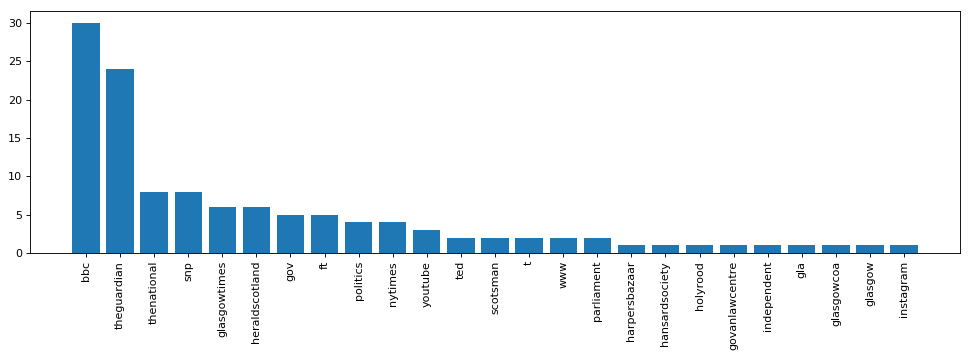

In [38]:
# Your Answer Here 
import seaborn as sns
import matplotlib.pyplot as plt


def get_frequent_domains(tweets_df, n = 25):
    nt_valid = tweets_df[(tweets_df['domain'] != 'twitter') & (tweets_df['valid_url'] == 'Yes')]
    top_25 = nt_valid.groupby('domain').size().sort_values(ascending = False)[:n]
    return top_25.to_dict()


dict_top_25 = get_frequent_domains(sturgeon_urls, 25)

plt.figure(num=None, figsize=(15, 4), dpi=80)
plt.bar(range(len(dict_top_25)), dict_top_25.values(), align='center')
plt.xticks(range(len(dict_top_25)), list(dict_top_25.keys()), rotation='vertical')

plt.show()

### <font color="green">YOUR TURN! (Question 7)</font> <a id='yt7'></a>

Question is Worth: <font color="green">1.5 points</font>

Collect historical Tweets for the other six party leaders, whose Twitter Screen Names are stored in our `accounts` object. For each identify the 20 most frequently linked domains that are external to Twitter. Do no include invalid URLs. 

In [ ]:
# Your Answer Here 

six_leader_historical = {}
for i in accounts:
    tweet_data = get_tweet_data1(i)
    ul = get_unique_urls(tweet_data)
    processed = [process_urls(l) for l in ul]
    partyl_urls = pd.DataFrame(processed)
    six_leader_historical[i] = get_frequent_domains(partyl_urls, 20)

six_leader_historical


### <font color="green">YOUR TURN! (Question 8)</font> <a id='yt8'></a>

Question is Worth: <font color="green">.5 points</font>

Compare the top 20 lists for all seven party leaders. What, if anything, do you notice when comparing the domains they frequently link to? 

Was not able to retrieve data due to the extensive time it took to run the above block of code. Everytime I waited, the kernel would disconnect which would lead to having me to restart and run the code again. Did not have enough time to create a parallel cluster to distribute workload but I'll give my inference on the data that I would possibly see. There would potentially be a variation among the links all seven party leaders frequently link to in part to their affiliation to the political viewpoints supported in favor to their party for which the frequency would be higher than other linked websites. Additionally. the links each political party links to provides an indication of the organizations the leaders support. 

## Getting Friend and Follower Data

So far we have collected general account metadata and historical tweet data and metadata (including hashtags, mentioned users, and links to external content). We *also* want to collect data on friends (who an account follows) and followers (who follows a given account). 

This requires making yet another request to the REST API. When we make the request, we can use Screen Names *or* Twitter IDs, which are unique strings that a user cannot modify. If we want to collect the most data possible within the shortest amount of time, then we will use Twitter IDs. 

### <font color="green">YOUR TURN! (Question 9)</font> <a id='yt9'></a>

Question is Worth: <font color="green">.5 points</font>

Search online to discover any important differences between using Twitter IDs than Twitter Screen Names. Then, in the cell below, explain why and how we can collect more data using Twitter IDs than Twitter Screen Names. 

Twitter IDs are unique identifiers that differentiates one account from another. No two people will have the same ID and an ID is immutable. Twitter Screen Names can be changed if wanted (mutable) but they're associated ID to the account will not be changed ever. Since `id` will never change and is unique, you can collect more data than `screen _name`. For some of the methods in Twitter's REST API service, user or friend search is better catered towards IDs rather than screen names based on the shear size of return in the objects. For searching friends associated to a certain twitter account, a `GET/followers/ids` generates over 5,000 user IDs within a group while `GET/followers/list`only provides groups of 20 users where both have optionality for pagination. Since there is a request limit of 15 during a 15 minute span, IDs help to grab a larger set of values within a shorter amount of time for a broader set to analyze. For cross-referencing or maanipulating from a historical data set containing screen name can be confusing since the screen_name is susceptible to change in comparison to ID.

Let's define a function called `get_friends` that will return a list of friends for a given user account. Tweepy will automatically monitor the rate limit, ensuring Twitter doesn't sever our connection for making too many requests within a 15-minute window. 

In [17]:
def get_friends(user_id):
    """
    Accepts a Twitter user ID number and gets a list of people the account follows ('friends'). 
    Could be screen name instead, but that is much slower and hits rate limiting faster. Count 
    would have to drop down to 200. 
    """
    friends = []
    cursor = tweepy.Cursor(api.friends_ids, id=user_id, count=5000) 
    for page in cursor.pages():
      for friend in page:
        friends.append(friend)
    return friends

Let's use our function to get a list of accounts that Nicola Sturgeon's account follows. We know from earlier (see the `meta` object) that her Twitter ID is `160952087`. 

In [18]:
sturgeon_friends = get_friends('160952087')
print('There are currently {} accounts following Nicola Sturgeon on Twitter.'.format(str(len(sturgeon_friends))))

There are currently 4735 accounts following Nicola Sturgeon on Twitter.


In [19]:
sturgeon_friends

[1279250209,
 211271453,
 1407335228,
 88472621,
 1058057871106154496,
 814989325083508736,
 938841328661745664,
 199693171,
 229436014,
 289888171,
 257546094,
 54858291,
 65597418,
 1147844729079574528,
 2436759096,
 23187207,
 862918426691547136,
 2404816650,
 85599723,
 1113791749904850944,
 28539615,
 19064312,
 1137150897295896578,
 1004712563366604800,
 369624728,
 2392137148,
 904004912765390848,
 459119926,
 27670162,
 2972824174,
 330965361,
 932217445649141760,
 2789958564,
 2409084909,
 823395307,
 1129846686468194304,
 3438309045,
 207000269,
 172750411,
 160496198,
 1141622500809498624,
 707326609175547905,
 304675431,
 271501367,
 826030816039956481,
 730424492,
 4837455365,
 22544807,
 3131627752,
 210446472,
 3369212393,
 867146911,
 390305702,
 1185983545648525313,
 827676532789374976,
 1252574040,
 335312037,
 276689545,
 1037810149539373057,
 287744545,
 1578676244,
 918865697639419907,
 20137622,
 584868370,
 1069945427317932033,
 535310014,
 987415741753380864,
 3

We now have a list of the accounts that follow Nicola Sturgeon. Let's take the first 10 and retrieve metadata about those accounts. We could do it for the full list, of course, but it will take a while because of Twitter's rate limiting. 

In [20]:
sturgeon_friends_test = sturgeon_friends[:10]
sturgeon_friends_test

[1279250209,
 211271453,
 1407335228,
 88472621,
 1058057871106154496,
 814989325083508736,
 938841328661745664,
 199693171,
 229436014,
 289888171]

In [21]:
sturgeon_friends_meta = [api.get_user(i) for i in sturgeon_friends_test]

In [23]:
sf_meta = [[i.name, i.screen_name, i.id, i.description, i.location, i.followers_count, i.friends_count, i.protected] for i in sturgeon_friends_meta]
pd.DataFrame(sf_meta)

,0,1,2,3,4,5,6,7
0,Chris McCorkindale,chrismccork,1279250209,Constitutional and admin lawyer @lawstrath; Pu...,United Kingdom,4067,4205,False
1,Lizzie Reid,lizziereidmusic,211271453,,"Glasgow, Scotland",224,64,False
2,Adam Bennett,marvellousadam,1407335228,"trustee @scoutsscotland, recovering magician, ...",Edinburgh,610,809,False
3,Susie McCabe,susie_mccabe,88472621,"Award Winning Stand Up Comic, “A naturally fun...",Upper East Merchant City,4418,2957,False
4,Julie Torley,JulieTorley,1058057871106154496,Trainee criminal defence lawyer. Passionate ab...,,394,441,False
5,Morgan Ross,morganrossxo,814989325083508736,🤍🤍🤍,"Glasgow, Scotland",332,697,False
6,Heather Carmichael,HeatherCarmic16,938841328661745664,,,3,33,False
7,Sameer Rahim,sameerahim,199693171,Managing Editor (Arts & Books) at Prospect Mag...,London,5268,2556,False
8,Dr Bendor Grosvenor,arthistorynews,229436014,Evangelist for Old Masters & Scotland. Present...,Edinburgh,26056,1544,False
9,Alex Clark,AlexClark3,289888171,"Reader, writer, talker. Guardian, Observer, Ra...",London / Kilkenny,11268,2678,False


We can, of course, do this for all of Nicola Sturgeon's friends. We can also do it for her friends' friends! And we can do it for the other politicians included in this module, and any other public Twitter accounts. 

# The Streaming API <a id='stream'></a>

The other API that researchers routinely use when collecting Twitter data is the Streaming API. As you now know, the Streaming API is rather different than the REST API. Unlike the REST API (which *pulls* data from Twitter), the Streaming API recieves data that is *pushed* from Twitter in real time. This requires defining a special listener class. The code block below defines the `MyStreamListener` class discussed in the assigned reading. Once you execute that code cell, you are ready to start recieving real time streaming data from Twitter. The listener will append new tweet data to a csv file called `streaming_tweet_data.csv`, which is stored in the `output` directory. 

In [24]:
SEP = ';'
csv = open('output/streaming_tweet_data.csv', 'a')
csv.write('Date' + SEP + 'Tweet' + SEP + 'Number of Followers' + SEP + 'Number of Friends' + SEP + 'Handle' + '\n')

class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        if hasattr(status, 'retweeted_status'):
            try:
                tweet = status.retweeted_status.extended_tweet["full_text"]
            except:
                tweet = status.retweeted_status.text
        else:
            try:
                tweet = status.extended_tweet["full_text"]
            except AttributeError:
                tweet = status.text
        
        date = status.created_at.strftime("%Y-%m-%d-%H:%M:%S")
        follower = str(status.user.followers_count)
        friend = str(status.user.friends_count)
        name = status.user.screen_name
        
        csv.write(date + SEP + tweet.strip().replace("\n","").replace('\r','').replace(';',',') + SEP + follower + SEP + friend + SEP + name + '\n')

To start streaming data, we have to initialize the class object and then provide some sort of search filter. In this case, we will stream tweets about Brexit. Remember, these tweets will *not* print to screen. They will be written to the `streaming_tweet_data.csv` file. 

I suggest you run the two cells below and then walk away for 10 minutes or so. Come back, 'interrupt' the Python kernel (you can do this by pressing the square stop button in the Jupyter toolbar) and checking the content of the `csv` file.

In [25]:
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

In [26]:
myStream.filter(track=['brexit'])

KeyboardInterrupt: 

# When you are ready to stop streaming data, you will have to 'interrupt' the Python kernel. Otherwise, it will keep collecting data from Twitter until the connection is somehow severed. You can do this by clicking the square black button at the top of your Jupyter Notebook, or by selecting 'Interrupt' from the Kernel menu at the top of the notebook. 

> **Important note!** You may get a `TweepError: Stream object already connected!` error when executing this part of the notebook. This is because Twitter will only allow one connection to the Streaming API at a time. If you get that error, then you should select "Restart & Clear Output" from the Kernel menu at the top of the notebook. You will need to re-import the packages and re-authenticate with Twitter by executing those cells at the top of the notebook. Then you can stream new data. Just don't connect the previous streaming object in the new session! 

### <font color="green">YOUR TURN! (Question 10)</font> <a id='yt10'></a>

Question is Worth: <font color="green">1.5 points</font>

Paste the code for the `MyStreamListener` class into the cell below. Then modify the code so that the Tweet data prints to screen rather than writes to an external file. To test your revisions to the class, execute the code block below your redefined class to stream tweets that come from the accounts of twitter accounts following Nicola Sturgeon (stored in the object `sturgeon_friends`, although we need to convert the items in the list from integers to strings). More specifically, print to screen information about (1) the date, (2) the screen name of the tweeting account, and (3) the text of the tweet itself. 

In [27]:
# Your Answer Here 
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        if hasattr(status, 'retweeted_status'):
            try:
                tweet = status.retweeted_status.extended_tweet["full_text"]
            except:
                tweet = status.retweeted_status.text
        else:
            try:
                tweet = status.extended_tweet["full_text"]
            except AttributeError:
                tweet = status.text
        
        date = status.created_at.strftime("%Y-%m-%d-%H:%M:%S")
        follower = str(status.user.followers_count)
        friend = str(status.user.friends_count)
        name = status.user.screen_name
        
        print(date + SEP + tweet.strip().replace("\n","").replace('\r','').replace(';',',') + SEP + follower + SEP + friend + SEP + name + '\n')

In [28]:
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

We can now feed `myStream` the list of Sturgeon friends, but we need to convert the Twitter IDs in the list from integers to strings. We can do this using the `map` function. 

In [29]:
sturgeon_friends = list(map(str, sturgeon_friends))
myStream.filter(follow=sturgeon_friends)

2020-02-03-01:38:28;Fans say the exclusion of Jennifer Lopez, Awkwafina, Lupita Nyong’o and Eddie Murphy from this year's Oscar awards is a glaring example of the Academy's continued history of omitting artists of color from its annual nominations. https://t.co/4F1xeyn8EX;222;1329;perryduff285

2020-02-03-01:38:28;@thehill Throwing Yang a Bone.;124;191;canmore2018

2020-02-03-01:38:28;@TheEllenShow @amazon We get it your a capitialist fuck who hangs out with war criminals "even if you disagree" and endorses inhumane businsses like Amazon.;19;91;Stix_Selvain

2020-02-03-01:38:28;@thehill Old man rants ... headlines write themselves;84;536;NikoliGuerra

2020-02-03-01:38:28;Colombian singer Shakira performs during the Pepsi Super Bowl LIV Halftime Show at Hard Rock Stadium in Miami. #SB54 https://t.co/atMu8gOW6a;3585;4993;GomezSantos22

2020-02-03-01:38:28;@SpeakerPelosi https://t.co/fe0uNVufas;11910;12358;sunwalker64

2020-02-03-01:38:28;Escaping the virus lockdown in Wuhan would have to

KeyboardInterrupt: 

Unless you've made a mistake in your function, you will see tweets starting to print to your screen. Let it stream for a minute or two, and then interrupt the kernel by pressing the `Stop` button from the Jupyter menu bar. If you don't interrupt the kernel, it will keep printing until the connection to the server is unintentionally disrupted. After it has streamed for a few minutes and you have interrupted the kernel, save the notebook for submission! 

<hr>

# <font color="green">Do You See Something That Could be Better?</font>

I am committed to collecting student feedback to continuously improve this course for future students. I would like to invite you to help me make those improvements. 

As you worked on this module, did you notice anything that could be improved? For example, did you find a typo in the module notebook? Did you find the explanation of a particular concept or block of code confusing? Is there something that just isn’t clicking for you? 

If you have any feedback for the content in this module, please enter it into the text block below. I will review feedback each week and make a list of things that should be changed before the next offering. 

Please know that *nothing you say here, however critical, will impact how I evaluate your work in this course*. There is no risk that I will assign a lower grade to you if you provide critical feedback. In fact, if the feedback you provide is thoughtful and constructive, I will assign up to 3% bonus marks on your final course grade. 

Thanks for your help improving the course! 

# Your Feedback Here :-) 

<hr>

# REFERENCES <a id='refs'></a>

* Mitchell, Ryan. 2018. *Web Scraping with Python: Collecting More Data from the Modern Web*. 2nd Edition. O'Reilly. 